## Numpy

In [3]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [5]:
import random
def arr_p():
    data = [random.random() for _ in range(10_000)]
    return [x + 1 for x in data]

def arr_n():
    data_np = np.random.random(10_000)
    return data_np + 1


In [7]:
%timeit arr_p()
%timeit arr_n()

699 μs ± 60.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
50.5 μs ± 3.02 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [8]:
from math import sin, cos


def sin_cos_p():
    r = []
    for x in [random.random() for _ in range(10_000)]:
        r.append(sin(x) + cos(x))

def sin_cos_np():
   data_np = np.random.random(10_000)
   return np.sin(data_np) + np.cos(data_np)


In [9]:
%timeit sin_cos_p()
%timeit sin_cos_np()


1.11 ms ± 533 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
289 μs ± 49.8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [10]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

def cube_sum_np(x):
    return np.sum(x ** 3)

def almost_variance_np(x):
    m = np.mean(x)
    return np.mean((x - m) ** 4)

In [11]:
x_list = [random.random() for _ in range(100_000)]
x_np = np.array(x_list)

%timeit cube_sum(x_list)
%timeit almost_variance(x_list)
%timeit cube_sum_np(x_np)
%timeit almost_variance_np(x_np)

6.22 ms ± 70.7 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.18 ms ± 100 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.27 ms ± 10.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.99 ms ± 145 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [12]:
A = np.arange(1, 11).reshape(10, 1) * np.arange(1, 11)
print(A)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [6]:
X = np.random.random((10, 5))
print(X)
D = np.sum((X[:, None, :] - X[None, :, :]) ** 2, axis=2)
print(D)

[[0.46113108 0.84342719 0.26276408 0.11001287 0.16322469]
 [0.72095878 0.63339393 0.39555537 0.63241116 0.74605636]
 [0.64308903 0.42670495 0.58116597 0.53622831 0.19770977]
 [0.32968992 0.50763342 0.1302528  0.35250333 0.0206196 ]
 [0.96542938 0.36287082 0.50675199 0.07188328 0.04145249]
 [0.22242598 0.16996702 0.46238336 0.91642764 0.99801275]
 [0.35444463 0.97684226 0.88145653 0.79281097 0.357037  ]
 [0.84917322 0.46831648 0.50350341 0.24731116 0.45457355]
 [0.01602536 0.24877999 0.46684277 0.41929219 0.45276821]
 [0.76069425 0.18598081 0.74194417 0.68929395 0.77325124]]
[[0.         0.74185066 0.49099471 0.22673131 0.56106364 1.89755245
  0.91573838 0.45297516 0.77286164 1.45928635]
 [0.74185066 0.         0.39317045 0.84389937 0.95597144 0.61191282
  0.66545348 0.28860653 0.78137854 0.32571783]
 [0.49099471 0.39317045 0.         0.37320691 0.35354818 1.04201746
  0.5673609  0.19968581 0.51666481 0.4523058 ]
 [0.22673131 0.84389937 0.37320691 0.         0.64605414 1.50914286
  1.09

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [16]:
def white(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [17]:
X = np.array([
    [0, 1],
    [2, 3],
    [4, 5],
    [6, 7],
    [8, 9]
], dtype=float)

X_white = white(X)
print(np.round(X_white, 8))


[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]


### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [25]:
A = np.array([[10, -4, 3], [0, 7, 1]])
x = 1.5

def closest(A, x):
    return np.min(abs(A - x))

closest(A, x)

np.float64(0.5)

### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [30]:
def pol(x, a):
    return np.sum(np.cumprod((np.r_[1, np.repeat(x, len(a) - 1)])) * a)

x = 2
a = np.array([1, 3, 5])

print(pol(x, a))

27


## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

float32 0.0 1.0


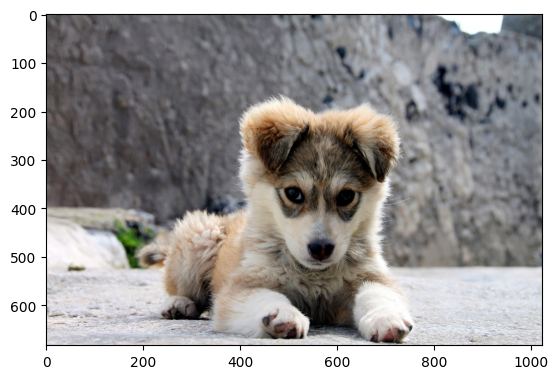

In [73]:
img = mpimg.imread('doggo.png')
print(img.dtype, img.min(), img.max())
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

In [33]:
def rgb2gray(image):
    weights = np.array([0.2126, 0.7152, 0.0722])
    return np.sum(image * weights, axis=2)

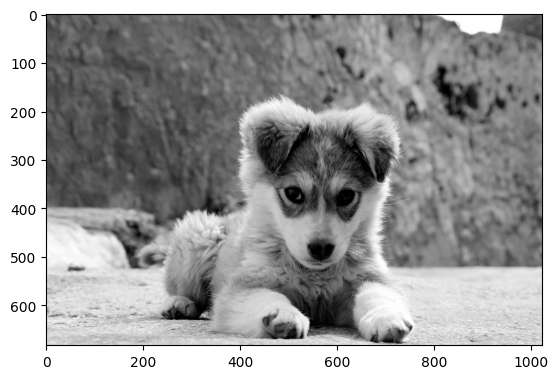

In [74]:
img = mpimg.imread('doggo.png')

if img.max() > 1.0:
    img = img / 255.0

gray = rgb2gray(img)
plt.imshow(img)
plt.imshow(gray, cmap='gray')
plt.show()

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [72]:
def inter(x1, x2, l):
    return l[:, None] * x1 + (1 - l)[:, None] * x2

print(np.linspace(0, 1, 11))
print(inter(np.array([1, 2, 3]), np.array([4, 5, 6]), np.linspace(0, 1, 11)))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[[4.  5.  6. ]
 [3.7 4.7 5.7]
 [3.4 4.4 5.4]
 [3.1 4.1 5.1]
 [2.8 3.8 4.8]
 [2.5 3.5 4.5]
 [2.2 3.2 4.2]
 [1.9 2.9 3.9]
 [1.6 2.6 3.6]
 [1.3 2.3 3.3]
 [1.  2.  3. ]]
